In [23]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [24]:
class QuadState(TypedDict):
    a : int
    b : int
    c : int

    eq : str
    d : float    # discriminant
    result : str

In [25]:
def show_eq(state : QuadState):
    eq = f"{state['a']}x2{state['b']}x{state['c']}"
    return {"eq" : eq}

def discriminant(state: QuadState):
    d = state['b'] ** 2 - (4 * state['a'] * state['c'])
    return {"d" : d}

In [26]:
def real_roots(state : QuadState):

    root1 = (-state['b'] + state['d'] ** 0.5) / (2 * state['a'])
    root2 = (-state['b'] - state['d'] ** 0.5) / (2 * state['a'])

    result = f"The roots are {root1} and {root2}"

    return {"result" : result}

In [27]:
def repeated_roots(state : QuadState):

    root1 = (-state['b']) / (2 * state['a'])

    result = f"Only repeating root is {root1}"

    return {"result" : result}

In [28]:
def no_real_roots(state : QuadState):

    result = "No real roots"

    return {"result" : result}

In [29]:
def check_cond(state : QuadState) -> Literal['real_roots', 'repeated_roots', 'no_real_roots']:
    if state['d'] > 0:
        return 'real_roots'
    elif state['d'] == 0:
        return 'repeated_roots'
    else:
        return 'no_real_roots'

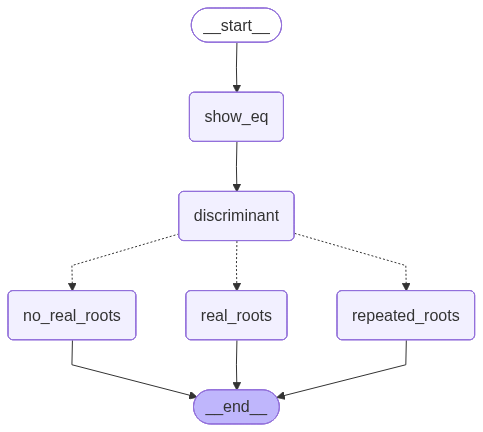

In [30]:
graph = StateGraph(QuadState)

graph.add_node('show_eq', show_eq)
graph.add_node("discriminant", discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_roots", repeated_roots)
graph.add_node("no_real_roots", no_real_roots)

graph.add_edge(START, "show_eq")
graph.add_edge("show_eq", "discriminant")
graph.add_conditional_edges("discriminant", check_cond)
graph.add_edge("real_roots", END)
graph.add_edge("repeated_roots", END)
graph.add_edge("no_real_roots", END)

workflow = graph.compile()
workflow

In [34]:
initial_state = {
    "a" : 2,
    "b" : 4,
    "c" : 2
}

workflow.invoke(initial_state)

{'a': 2,
 'b': 4,
 'c': 2,
 'eq': '2x24x2',
 'd': 0,
 'result': 'Only repeating root is -1.0'}